In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
# Path ke dataset
base_dir = r'D:\!KULIAH!\Semester 6\Capstone\training_set-20240602T092501Z-001\training_set'

# Memuat dataset
def load_dataset(base_dir):
    images = []
    labels = []
    for label in ['0', '1']:
        class_dir = os.path.join(base_dir, label)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(int(label))
    return np.array(images), np.array(labels)

images, labels = load_dataset(base_dir)

# Normalisasi data
images = images / 255.0

In [4]:
test_ratio = 0.1
validation_ratio = 0.15

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_ratio, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

# Print jumlah gambar di masing-masing subset
print(f'Jumlah gambar di training set: {len(X_train)}')
print(f'Jumlah gambar di validation set: {len(X_validation)}')
print(f'Jumlah gambar di test set: {len(X_test)}')

Jumlah gambar di training set: 1275
Jumlah gambar di validation set: 226
Jumlah gambar di test set: 167


In [5]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Membangun model CNN dengan Dropout dan Regularisasi L2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Regularization
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\erlis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Kompilasi model dengan learning rate yang lebih kecil dan loss function yang berbeda
optimizer = Adam(learning_rate=0.0001)  # Learning rate lebih kecil
loss_function = BinaryCrossentropy(from_logits=True)  # Loss function yang berbeda

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, 
                    epochs=250, 
                    validation_data=(X_validation, y_validation), 
                    batch_size=68)

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9769 - loss: 0.1301 - val_accuracy: 0.8009 - val_loss: 0.6241
Epoch 2/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9825 - loss: 0.1083 - val_accuracy: 0.7965 - val_loss: 0.7076
Epoch 3/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9807 - loss: 0.1215 - val_accuracy: 0.7832 - val_loss: 0.6520
Epoch 4/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9831 - loss: 0.1040 - val_accuracy: 0.7965 - val_loss: 0.6605
Epoch 5/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9935 - loss: 0.0881 - val_accuracy: 0.7920 - val_loss: 0.6708
Epoch 6/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9876 - loss: 0.0946 - val_accuracy: 0.7876 - val_loss: 0.7115
Epoch 7/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9895 - loss: 0.0945 - val_accuracy: 0.7876 - val_loss: 0.7084
Epoch 8/250
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9860 - loss: 0.0997 - val_accu

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,051,781 (7.83 MB)

 Trainable params: 683,777 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,367,556 (5.22 MB)

None


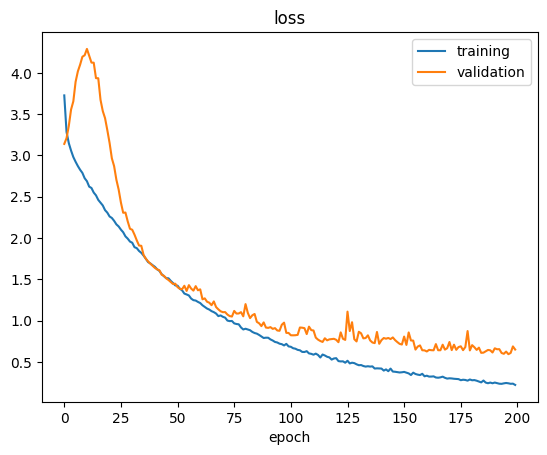

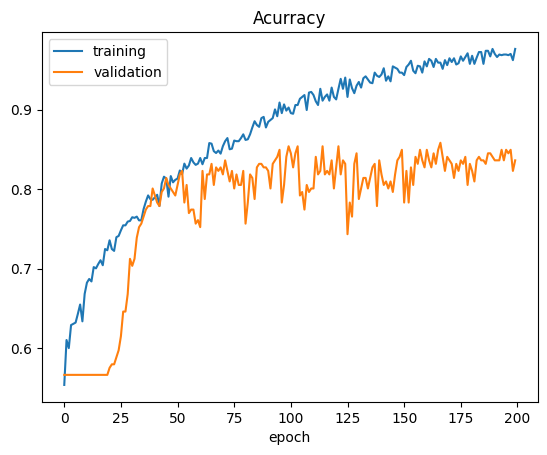

Test Score: 0.7111214995384216
Test Accuracy: 0.8443113565444946


In [20]:
print(model.summary())

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

In [1]:
# Menyimpan model
model.save('face_weight_classifier.h5')

NameError: name 'model' is not defined